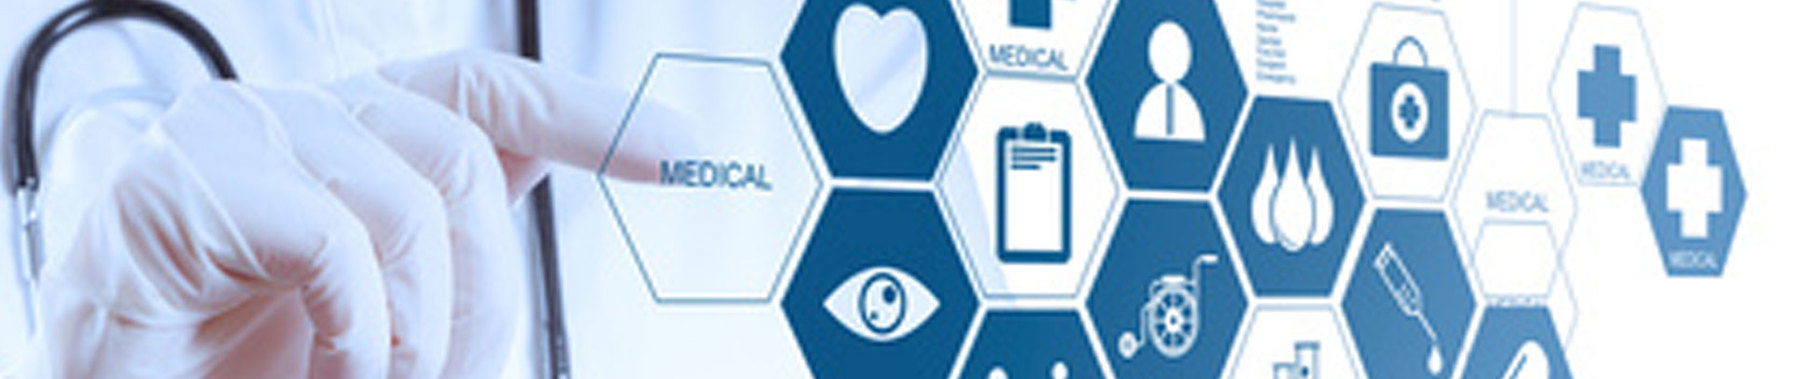

# **About The Dataset**

---

### - **Age**  
   The age of the individual, which can influence health risks and insurance charges.  
   🎂📊

---

### - **Sex**  
   The gender of the individual (Male or Female). This may be used to analyze how health insurance charges differ by gender.  
   🚹🚺

---

### - **BMI (Body Mass Index)**  
   A measure of body fat based on height and weight. It helps assess an individual’s overall health and risk of certain diseases, which can impact insurance costs.  
   ⚖️💪

---

### - **Children**  
   The number of children/dependents the individual has. This can be relevant for insurance plans that cover family members and influence the total charges.  
   👶👨‍👩‍👧‍👦

---

### - **Smoker**  
   Whether the individual smokes (Yes or No). Smoking can lead to higher health risks, which is reflected in higher insurance premiums.  
   🚬❌

---

### - **Region**  
   The geographical location of the individual (e.g., northeast, southwest, etc.). This may affect the cost of health insurance depending on local healthcare costs and policies.  
   🌍🏙️

---

### - **Charges**  
   The medical charges billed to the individual by the insurance company. These are influenced by factors such as age, smoking status, BMI, and region, and are the dependent variable of interest in insurance models.  
   💰💳

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("insurance.csv") 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df1 = df.copy()     # We took a copy of our original data because we will be working on it.

In [4]:
df.info() 

# The `df.info()` method provides a quick overview of a pandas DataFrame’s structure, displaying data types, null values, 
# and memory usage for each column, which is crucial for understanding the dataset before analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T 

# This method provides a transposed summary of the descriptive statistics for a pandas DataFrame, including count, mean, standard deviation, 
# min, 25th percentile, median, 75th percentile, and max for numerical columns.

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
df.isnull().sum() # The missing values have been assigned to a variable, and they are presented in the following charts.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Relationship Between Age and Medical Expenses:

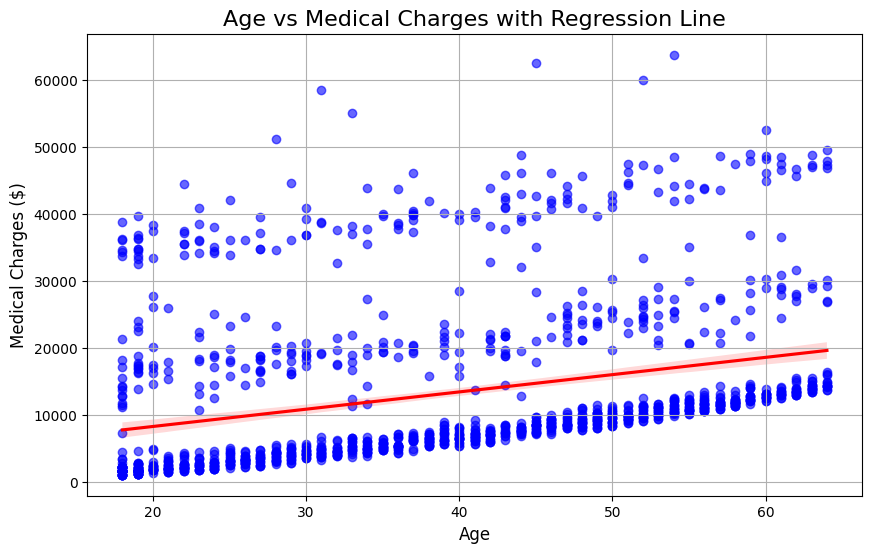

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="age", y="charges", scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Age vs Medical Charges with Regression Line", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Medical Charges ($)", fontsize=12)
plt.grid(True)
plt.show()

## Gender and Average Medical Expenses:

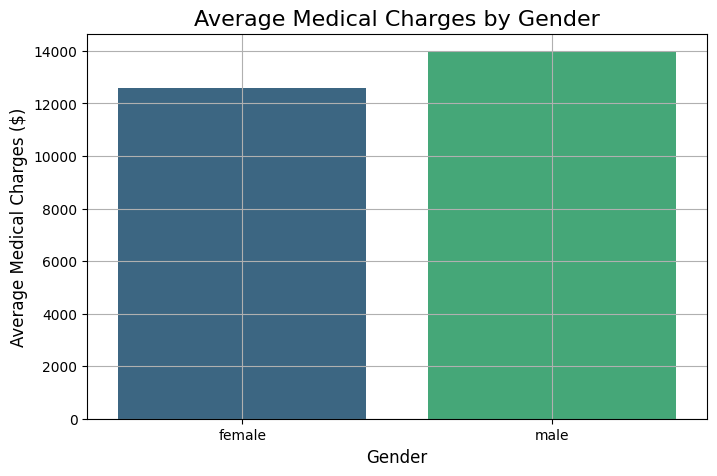

In [8]:
average_charges_by_sex = df.groupby('sex')['charges'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=average_charges_by_sex, x="sex", y="charges", palette="viridis")
plt.title("Average Medical Charges by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Medical Charges ($)", fontsize=12)
plt.grid(True)
plt.show()

## Relationship Between BMI and Medical Expenses:

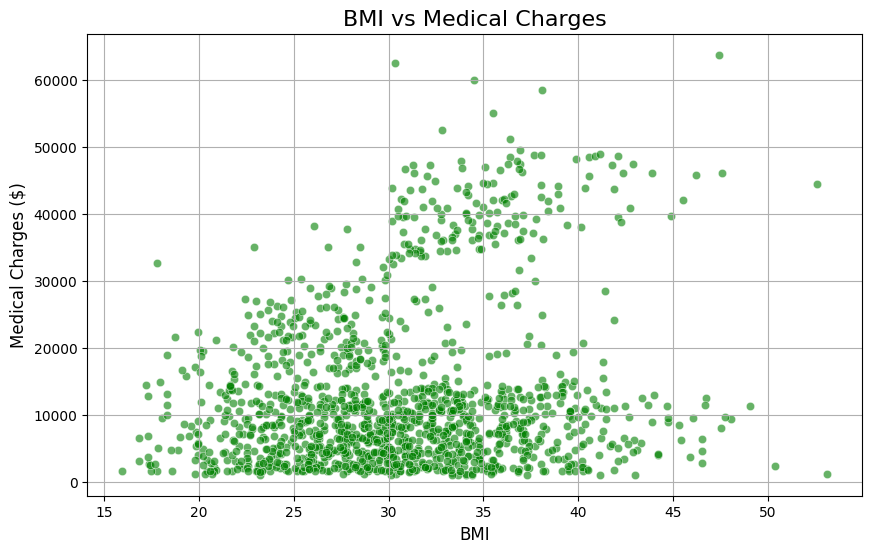

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="bmi", y="charges", color="green", alpha=0.6)
plt.title("BMI vs Medical Charges", fontsize=16)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Medical Charges ($)", fontsize=12)
plt.grid(True)
plt.show()

## Comparison of Smokers and Non-Smokers:

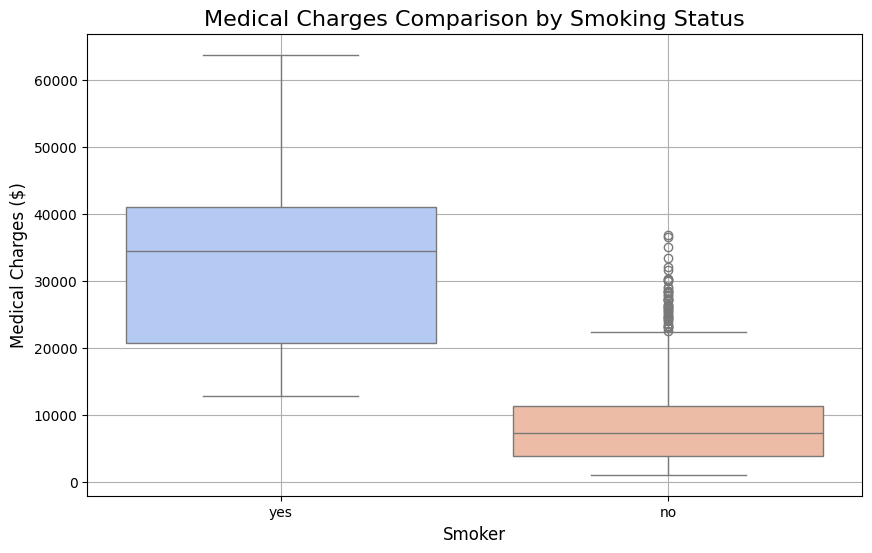

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="smoker", y="charges", palette="coolwarm")
plt.title("Medical Charges Comparison by Smoking Status", fontsize=16)
plt.xlabel("Smoker", fontsize=12)
plt.ylabel("Medical Charges ($)", fontsize=12)
plt.grid(True)
plt.show()

# Cost Analysis by Region:

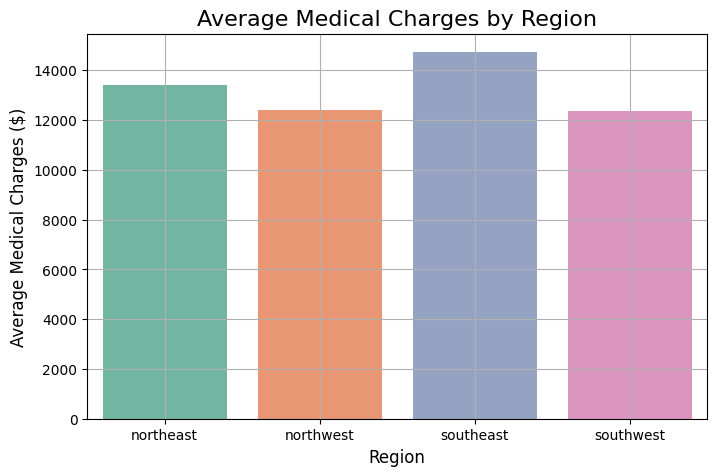

In [11]:
average_charges_by_region = df.groupby('region')['charges'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data = average_charges_by_region, x="region", y="charges", palette="Set2")
plt.title("Average Medical Charges by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Medical Charges ($)", fontsize=12)
plt.grid(True)
plt.show()

## Relationship Between Number of Children and Expenses:

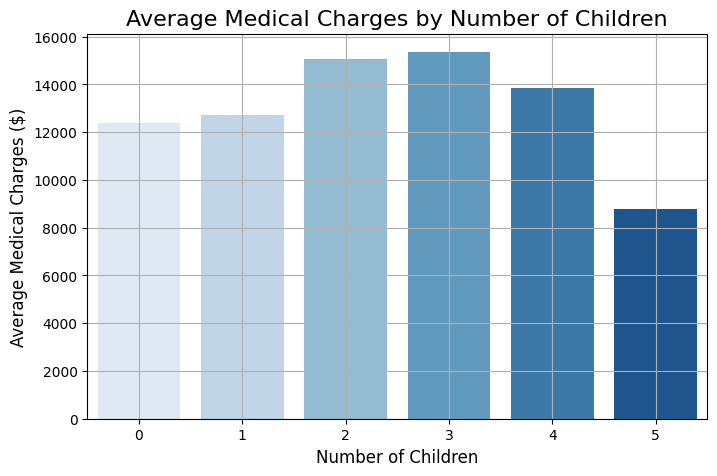

In [12]:
average_charges_by_children = df.groupby('children')['charges'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=average_charges_by_children, x="children", y="charges", palette="Blues")
plt.title("Average Medical Charges by Number of Children", fontsize=16)
plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Average Medical Charges ($)", fontsize=12)
plt.grid(True)
plt.show()

## Combined Effect of Smoking, BMI and Expenses:

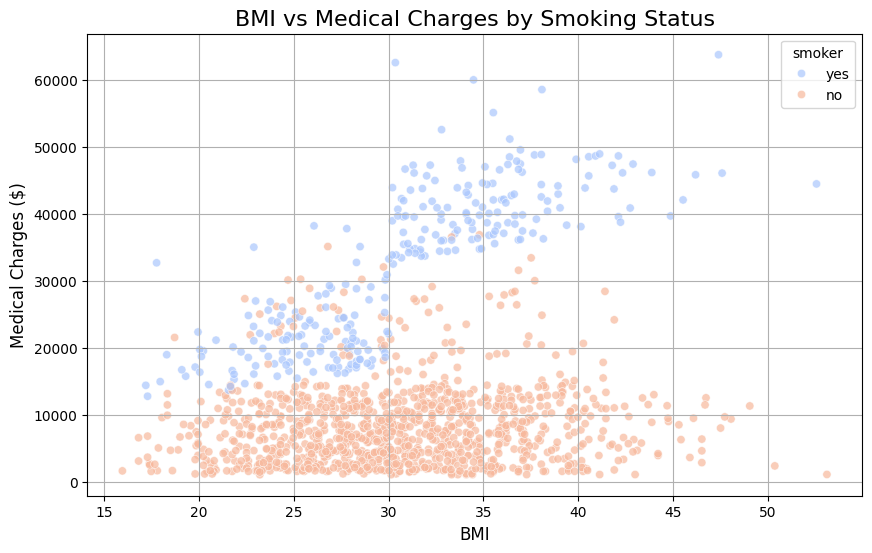

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", palette="coolwarm", alpha=0.7)
plt.title("BMI vs Medical Charges by Smoking Status", fontsize=16)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Medical Charges ($)", fontsize=12)
plt.grid(True)
plt.show()

# **Analysis and Results**

---

1. **Relationship between Age and Medical Expenses**

We examined the relationship between age and medical expenses and visualized it with a scatter plot. 📊

---

2. **Gender and Average Medical Expenses**
We compared the average medical expenses between men and women and visualized it with a bar plot. 💃👨‍⚕️

---

3. **Relationship between BMI and Medical Expenses**
We showed the effect of BMI values ​​on medical expenses with a scatter plot. ⚖️💰

---

4. **Comparison of Smokers and Nonsmokers**
We compared the medical expenses between smokers and nonsmokers with a box plot. 🚬❌

---

5. **Expense Analysis by Region**

We examined the average medical expenses in different regions with a bar plot. 🌍💸

---

6. **Number of Children and Expense Relationship**
We visualized the change in medical expenses according to the number of children with a bar plot. 👶📊

---

7. **Effect of Smoking, BMI and Expenses Together**
We showed the relationship between BMI and medical expenses of smokers and non-smokers with a scatter plot. 🚬⚖️

---

8. **Estimation of Medical Expenses**
We created a regression model using features and evaluated the performance of the model with MSE and RMSE. 🤖💡

---